In [1]:
import tensorflow as tf

from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from PIL import Image

In [2]:
#Preprocesarea datelor de training:
train_datagenerator = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)


data_train = train_datagenerator.flow_from_directory(
    'train',
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'categorical',
    shuffle=True)

#Preprocesarea datelor de test:
test_datagenerator = ImageDataGenerator(rescale = 1./255)

data_test = test_datagenerator.flow_from_directory(
    'test',
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'categorical',
    shuffle = False)

validation_generator = test_datagenerator.flow_from_directory(
    'test',
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'categorical',
    shuffle = False)

from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

#modelul este denumit retea_neuronala si e de tip Sequential
retea_neuronala = tf.keras.models.Sequential()

retea_neuronala.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = [224, 224, 3]))
retea_neuronala.add(MaxPooling2D(pool_size = 2, strides = 2))
                    
retea_neuronala.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = [224, 224, 3]))
retea_neuronala.add(MaxPooling2D(pool_size = 2, strides = 2))

retea_neuronala.add(Dropout(0.5)) #dezactiveaza aleatoriu cativa neuroni
retea_neuronala.add(Flatten())  #1D
retea_neuronala.add(Dense(units = 64, activation = 'relu')) #hidden layer
retea_neuronala.add(Dense(units = 20, activation = 'softmax'))   #output layer 
retea_neuronala.summary()

Found 2693 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0     

In [3]:
#Compilarea si antrenarea modelului
retea_neuronala.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
a = retea_neuronala.fit(data_train,
                        validation_data = validation_generator,
                        epochs = 7,
                        steps_per_epoch = len(data_train),
                        validation_steps = len(data_test))

Epoch 1/7
337/337 [==============================] - 31s 79ms/step - loss: 2.7174 - accuracy: 0.2458 - val_loss: 2.1311 - val_accuracy: 0.4200
Epoch 2/7
337/337 [==============================] - 26s 77ms/step - loss: 1.8091 - accuracy: 0.4790 - val_loss: 1.0752 - val_accuracy: 0.6800
Epoch 3/7
337/337 [==============================] - 26s 76ms/step - loss: 1.4240 - accuracy: 0.5934 - val_loss: 0.9288 - val_accuracy: 0.7300
Epoch 4/7
337/337 [==============================] - 26s 76ms/step - loss: 1.2279 - accuracy: 0.6409 - val_loss: 0.9159 - val_accuracy: 0.7400
Epoch 5/7
337/337 [==============================] - 26s 77ms/step - loss: 1.1210 - accuracy: 0.6818 - val_loss: 0.8979 - val_accuracy: 0.7400
Epoch 6/7
337/337 [==============================] - 25s 74ms/step - loss: 1.0296 - accuracy: 0.7014 - val_loss: 0.8172 - val_accuracy: 0.7700
Epoch 7/7
337/337 [==============================] - 25s 74ms/step - loss: 0.9511 - accuracy: 0.7434 - val_loss: 1.5604 - val_accuracy: 0.6500

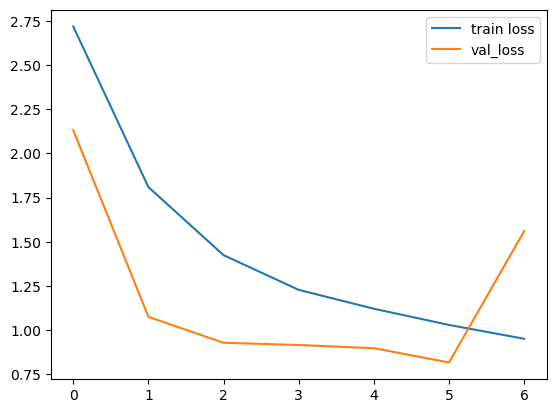

In [4]:
#loss
plt.plot(a.history['loss'], label = 'train loss')
plt.plot(a.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

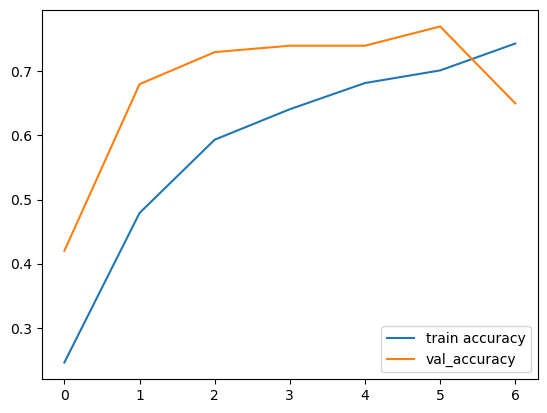

In [5]:
plt.plot(a.history['accuracy'], label = 'train accuracy')
plt.plot(a.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [6]:
dictionar_pasari = data_train.class_indices
print(dictionar_pasari)

{'ALBATROSS': 0, 'ALEXANDRINE PARAKEET': 1, 'BARN OWL': 2, 'BLACK SWAN': 3, 'BLACK VULTURE': 4, 'BLUE HERON': 5, 'CANARY': 6, 'COCKATOO': 7, 'CROW': 8, 'DOWNY WOODPECKER': 9, 'EMPEROR PENGUIN': 10, 'EMU': 11, 'FLAMINGO': 12, 'HAWAIIAN GOOSE': 13, 'JABIRU': 14, 'KIWI': 15, 'KOOKABURRA': 16, 'LILAC ROLLER': 17, 'OSTRICH': 18, 'PEACOCK': 19}


In [7]:
test_lista = dictionar_pasari.keys()
print(test_lista)

dict_keys(['ALBATROSS', 'ALEXANDRINE PARAKEET', 'BARN OWL', 'BLACK SWAN', 'BLACK VULTURE', 'BLUE HERON', 'CANARY', 'COCKATOO', 'CROW', 'DOWNY WOODPECKER', 'EMPEROR PENGUIN', 'EMU', 'FLAMINGO', 'HAWAIIAN GOOSE', 'JABIRU', 'KIWI', 'KOOKABURRA', 'LILAC ROLLER', 'OSTRICH', 'PEACOCK'])


In [8]:
pasari = list()
for i in dictionar_pasari.keys():
    pasari.append(i)
    
print(pasari)


['ALBATROSS', 'ALEXANDRINE PARAKEET', 'BARN OWL', 'BLACK SWAN', 'BLACK VULTURE', 'BLUE HERON', 'CANARY', 'COCKATOO', 'CROW', 'DOWNY WOODPECKER', 'EMPEROR PENGUIN', 'EMU', 'FLAMINGO', 'HAWAIIAN GOOSE', 'JABIRU', 'KIWI', 'KOOKABURRA', 'LILAC ROLLER', 'OSTRICH', 'PEACOCK']


In [9]:
retea_neuronala.save('bird_species.h5')

In [10]:
from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

model1 = load_model('./bird_species.h5', compile = False)

In [11]:
eticheta = data_train.class_indices
eticheta = {k:v for v,k in eticheta.items()}
print(eticheta)

{0: 'ALBATROSS', 1: 'ALEXANDRINE PARAKEET', 2: 'BARN OWL', 3: 'BLACK SWAN', 4: 'BLACK VULTURE', 5: 'BLUE HERON', 6: 'CANARY', 7: 'COCKATOO', 8: 'CROW', 9: 'DOWNY WOODPECKER', 10: 'EMPEROR PENGUIN', 11: 'EMU', 12: 'FLAMINGO', 13: 'HAWAIIAN GOOSE', 14: 'JABIRU', 15: 'KIWI', 16: 'KOOKABURRA', 17: 'LILAC ROLLER', 18: 'OSTRICH', 19: 'PEACOCK'}


In [12]:
def output(location):
    imagine = load_img(location, target_size = (224, 224, 3))
    imagine = img_to_array(imagine)
    imagine = imagine/255
    imagine = np.expand_dims(imagine,[0])
    answer = model1.predict(imagine)
    y_class = answer.argmax(axis = -1)
    y = ' '.join(str(x) for x in y_class)
    y = int(y)
    rezultat = eticheta[y]
    return rezultat
    

In [13]:
prezis = model1.predict(data_test)
y_pred2 = np.argmax(prezis, axis = 1)

13/13 [==============================] - 0s 28ms/step


In [14]:
classification_metrics = metrics.classification_report(validation_generator.classes, y_pred2, target_names = pasari)
print(classification_metrics)

                      precision    recall  f1-score   support

           ALBATROSS       1.00      0.40      0.57         5
ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
            BARN OWL       0.67      0.40      0.50         5
          BLACK SWAN       0.71      1.00      0.83         5
       BLACK VULTURE       0.00      0.00      0.00         5
          BLUE HERON       0.25      0.40      0.31         5
              CANARY       1.00      0.80      0.89         5
            COCKATOO       0.45      1.00      0.62         5
                CROW       0.67      0.40      0.50         5
    DOWNY WOODPECKER       0.50      0.40      0.44         5
     EMPEROR PENGUIN       1.00      1.00      1.00         5
                 EMU       0.00      0.00      0.00         5
            FLAMINGO       0.33      1.00      0.50         5
      HAWAIIAN GOOSE       0.75      0.60      0.67         5
              JABIRU       0.67      0.80      0.73         5
       

C:\Users\alxgr\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alxgr\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alxgr\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print (prezis)

[[2.75328100e-01 9.92423855e-04 1.07807564e-02 ... 2.72010383e-03
  1.52883166e-02 7.56333175e-04]
 [7.14221656e-01 1.40047973e-06 1.08402714e-01 ... 9.98893768e-08
  1.36601238e-05 1.27162892e-07]
 [5.52063107e-01 5.49778924e-04 1.15439683e-01 ... 2.61859590e-04
  2.69290613e-04 7.78576396e-06]
 ...
 [4.24997910e-04 1.80611532e-04 3.28253896e-06 ... 1.47021823e-02
  7.00224405e-07 9.83131886e-01]
 [1.50178108e-04 2.56985572e-06 3.80420417e-11 ... 9.73645821e-02
  3.01752928e-11 9.02482092e-01]
 [1.01186706e-04 6.38965212e-05 6.10796889e-08 ... 1.26564468e-04
  1.80443209e-07 9.99110997e-01]]


In [23]:
print (y_pred2)

[ 0  0  0 16  9  1  1  1  1  1  2  2  7  2  2  3  3  3  3  5  4  9  4  4
 11  5  5  5  5 18  6  6  6  6  6  7  7  7  7  7  4  8  8  8  8  9  9  9
  9  9 10 10 10 10 10 11 11 18 13  7 12  2 12 12 12 13 13 13  0 13 14 14
 18 14 14 15  8 15 15 15 16 16  2  2 16  9 17 17 17 17 18  8 18 18 18 19
 19 19 19 19]


In [21]:
print (validation_generator.classes)

[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4
  4  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9
  9  9 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14
 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19
 19 19 19 19]


<AxesSubplot:title={'center':'Confusion Matrix'}>

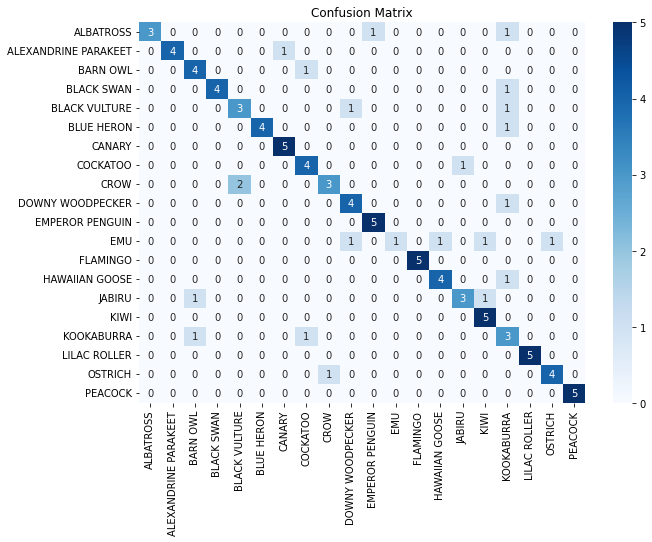

In [22]:
cm = confusion_matrix(validation_generator.classes,y_pred2) 
cm = pd.DataFrame(cm, index=['ALBATROSS', 'ALEXANDRINE PARAKEET', 'BARN OWL', 'BLACK SWAN', 'BLACK VULTURE', 'BLUE HERON', 'CANARY', 'COCKATOO', 'CROW', 'DOWNY WOODPECKER', 'EMPEROR PENGUIN', 'EMU', 'FLAMINGO', 'HAWAIIAN GOOSE', 'JABIRU', 'KIWI', 'KOOKABURRA', 'LILAC ROLLER', 'OSTRICH', 'PEACOCK'], columns=['ALBATROSS', 'ALEXANDRINE PARAKEET', 'BARN OWL', 'BLACK SWAN', 'BLACK VULTURE', 'BLUE HERON', 'CANARY', 'COCKATOO', 'CROW', 'DOWNY WOODPECKER', 'EMPEROR PENGUIN', 'EMU', 'FLAMINGO', 'HAWAIIAN GOOSE', 'JABIRU', 'KIWI', 'KOOKABURRA', 'LILAC ROLLER', 'OSTRICH', 'PEACOCK'])

plt.figure(figsize = (10,7)) 
ax = plt.subplot() 
ax.set_title('Confusion Matrix')

sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)


'FLAMINGO'

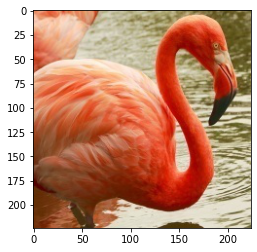

In [26]:
imagine = 'test/FLAMINGO/1.jpg'
picture = load_img(imagine, target_size = (224, 224, 3))
plt.imshow(picture)
output(imagine)